# sklearn

Library de machine learn:
  * Classification
  * Regression
  * Clustering
  * Reduction de dimension (=features, pca...)

http://scikit-learn.org/stable/


Attetion sklearn travail sur des object numpy.ndarray donc il faut passer du DataFrame vers numpy avecs .values



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

In [2]:
import sklearn

In [3]:
iris = sns.load_dataset("iris")

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<IPython.core.display.Javascript object>


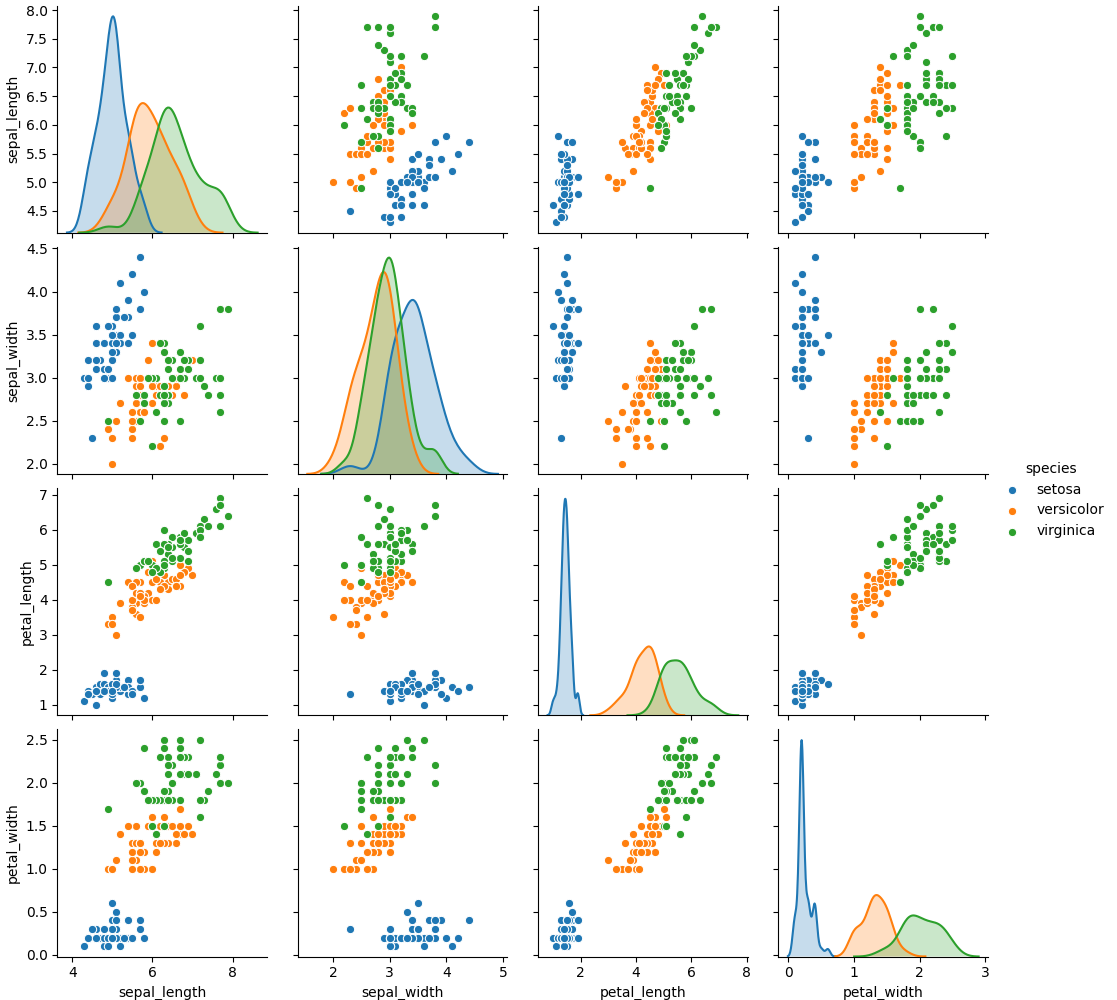

In [5]:
sns.pairplot(iris, hue="species")

# Features reduction, example avec PCA

attention en transform tout en numpy

In [6]:
data = iris.drop('species', axis=1).values
labels = iris['species'].values
print(data.shape, type(data))
print(labels.shape, type(labels))

(150, 4) <class 'numpy.ndarray'>
(150,) <class 'numpy.ndarray'>


In [7]:
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit(data).transform(data)
print(data_pca.shape, type(data_pca))
iris_pca = pd.DataFrame(data_pca, columns=['pca0', 'pca1'], index=iris.index)
iris_pca.head(10)



(150, 2) <class 'numpy.ndarray'>


,pca0,pca1
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
5,-2.280860,0.741330
6,-2.820538,-0.089461
7,-2.626145,0.163385
8,-2.886383,-0.578312
9,-2.672756,-0.113774


<IPython.core.display.Javascript object>


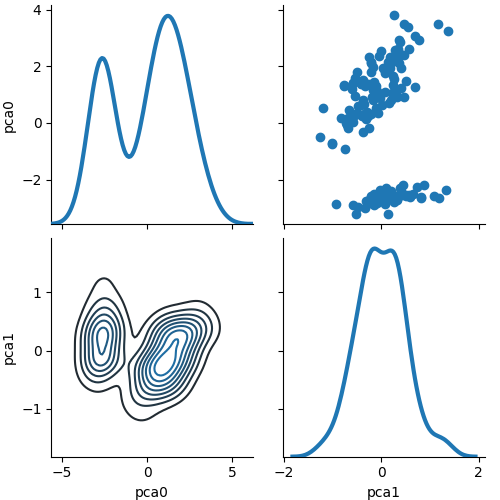

In [10]:
g = sns.PairGrid(iris_pca, diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [11]:
iris_pca['species'] = iris['species']
iris_pca.head()

,pca0,pca1,species
0,-2.684126,0.319397,setosa
1,-2.714142,-0.177001,setosa
2,-2.888991,-0.144949,setosa
3,-2.745343,-0.318299,setosa
4,-2.728717,0.326755,setosa


<IPython.core.display.Javascript object>


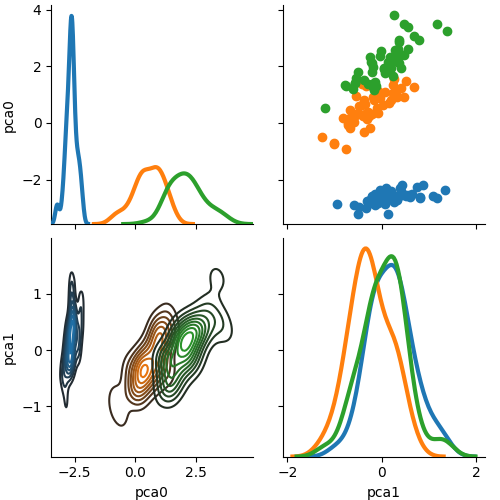

In [12]:
g = sns.PairGrid(iris_pca, diag_sharey=False, hue="species")
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)

In [13]:
pca.explained_variance_ratio_


array([0.92461872, 0.05306648])

In [14]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [15]:
pca.components_.T

array([[ 0.36138659,  0.65658877],
       [-0.08452251,  0.73016143],
       [ 0.85667061, -0.17337266],
       [ 0.3582892 , -0.07548102]])

Formule de la projection = multiplication matriciel (changement de repere)

$proj = ((data - mean(data)) \cdot componentstranspose $

In [16]:
data_pca2 = np.dot(data-np.mean(data, axis=0), pca.components_.T)
np.all(data_pca2 == data_pca)

True

In [17]:
proj = pd.DataFrame(pca.components_.T, index=iris.columns[:-1], columns=['pca0', 'pca1'])
proj

,pca0,pca1
sepal_length,0.361387,0.656589
sepal_width,-0.084523,0.730161
petal_length,0.856671,-0.173373
petal_width,0.358289,-0.075481


<IPython.core.display.Javascript object>


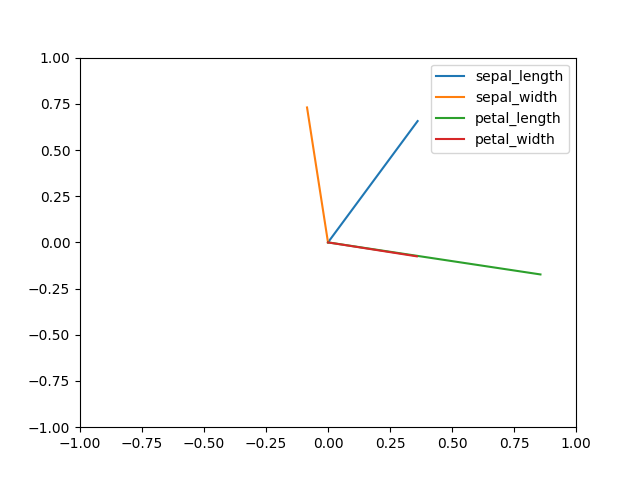

(-1.0, 1.0)

In [18]:
fig, ax = plt.subplots()
#ax.plot(iris_pca['pca0'],iris_pca['pca1'], ls='None', marker='.' )
for feat, row in proj.iterrows():
    ax.plot([0,row['pca0']], [0, row['pca1']], label=feat)
ax.legend()
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)


# Clustering = regrouper par similarité

On a une population dont on ne connais pas les labels on veut les regrouper.

Il faut lire la doc de sklearn.

http://scikit-learn.org/stable/modules/clustering.html#clustering


Example avec kKMeans et MeanShift


In [19]:
from sklearn.cluster import KMeans, MeanShift
iris = sns.load_dataset("iris")

In [20]:
data = iris.drop('species', axis=1).values
labels = KMeans(n_clusters=2).fit_predict(data)
iris['pred_kmeans'] = labels
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pred_kmeans
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [21]:
data = iris.drop('species', axis=1).values
labels = MeanShift().fit_predict(data)
iris['pred_meanshift'] = labels
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species,pred_kmeans,pred_meanshift
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1


<IPython.core.display.Javascript object>


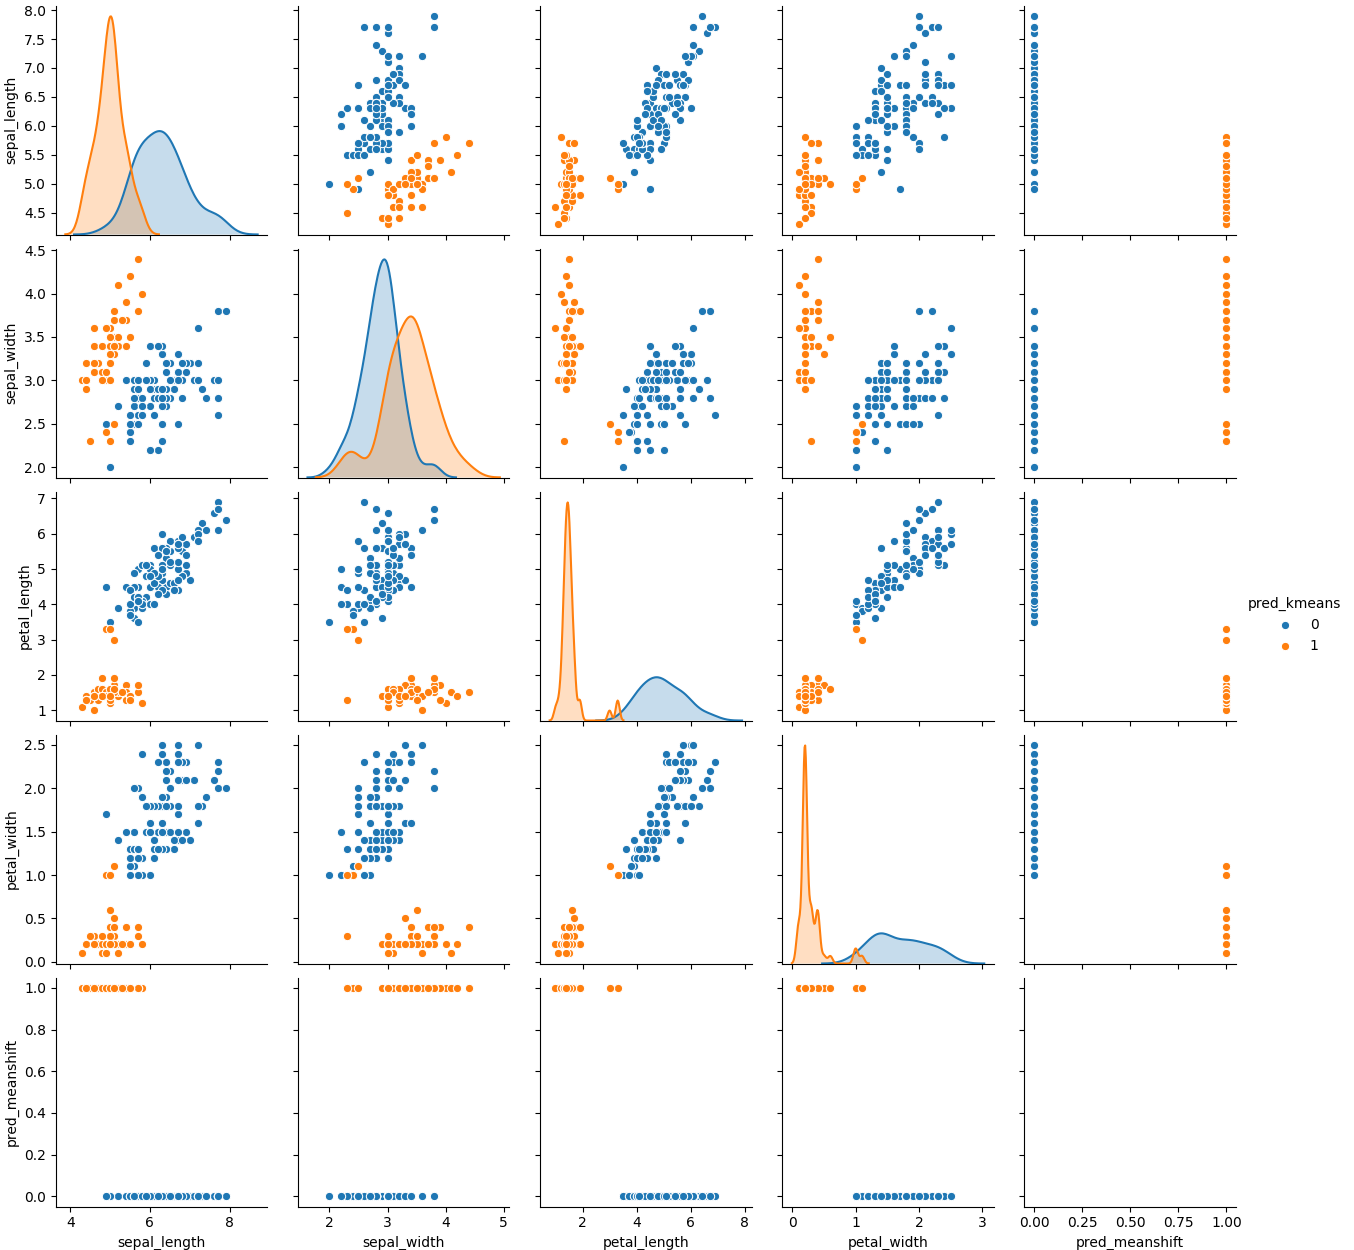

/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<IPython.core.display.Javascript object>


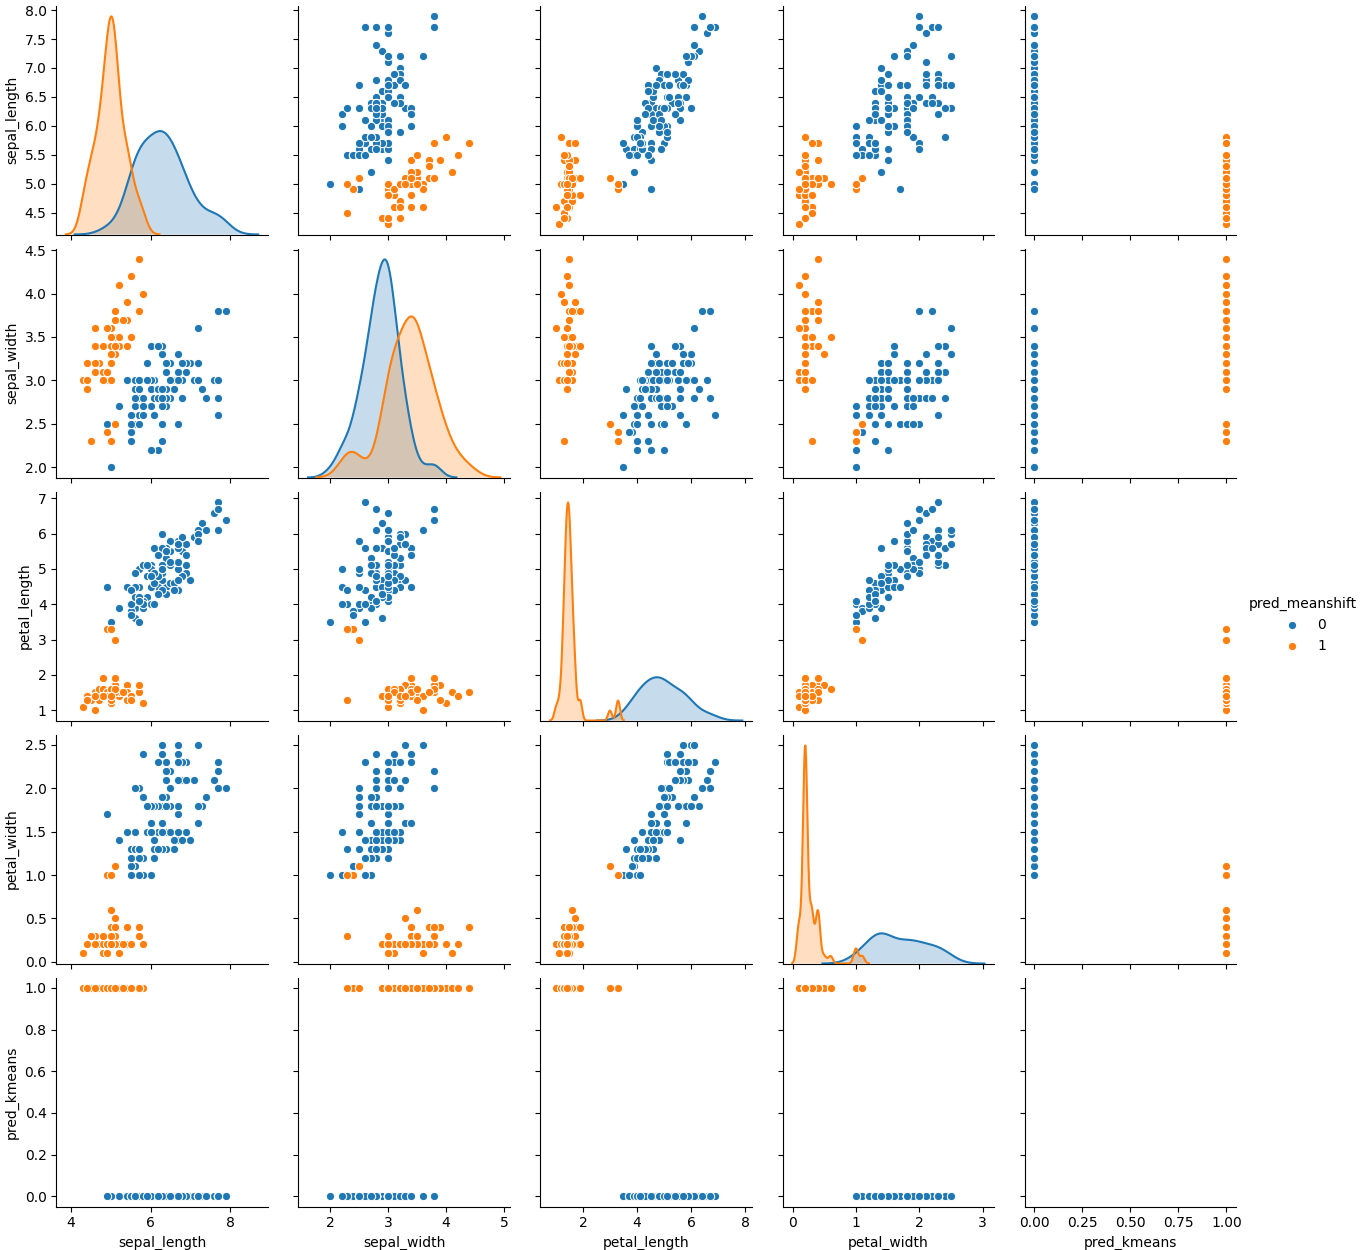

/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/home/samuel/.virtualenvs/py38/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


In [22]:
sns.pairplot(iris, hue="pred_kmeans")
sns.pairplot(iris, hue="pred_meanshift")

# Classification supervisé

On des données avec plusieurs variables. On connais le label (ou une autre variable) pour un sous ensemble et on veut predir ce label (ou autre varibale) pour le reste du dataset.




# Example avec SVC = C-Support Vector Classification

Bien lire la doc!!!!!

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC


In [23]:
from sklearn.svm import SVC


creation d'un categorie

In [24]:
iris = sns.load_dataset("iris")
iris['species'] = iris['species'].astype('category')
iris['species'] = iris['species'].cat.codes
#category = iris['species'].cat
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
print(iris.shape)
train_iris = iris.sample(20)
print(train_iris.shape)
precdit_iris = iris[~iris.index.isin(train_iris.index)]
print(precdit_iris.shape)

(150, 5)
(20, 5)
(130, 5)


In [26]:
predictor = SVC(kernel='linear', C=1.)

In [27]:
data = train_iris.drop('species', axis=1).values
labels = train_iris['species']
predictor.fit(data, labels)

SVC(kernel='linear')

In [28]:
data = precdit_iris.drop('species', axis=1).values
label2 = predictor.predict(data)
print(precdit_iris['species'].values)
print(label2)
print('nb error', (precdit_iris['species']!=label2).sum())


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 1 1
 2 2 2 2 1 2 2 2 1 2 2 2 2 2 2 1 2 2 1]
nb error 10


<IPython.core.display.Javascript object>


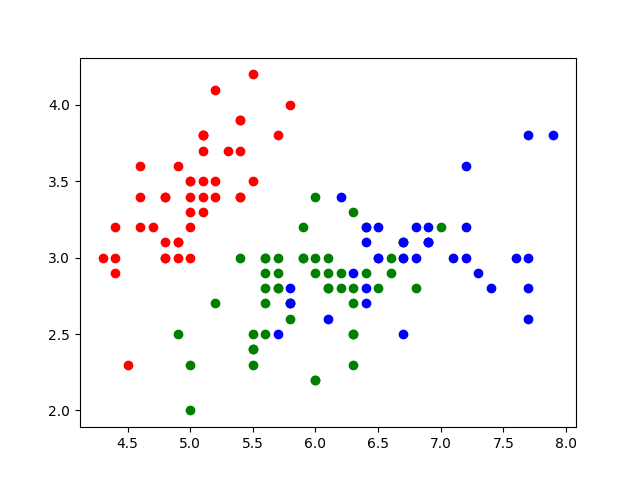

<IPython.core.display.Javascript object>


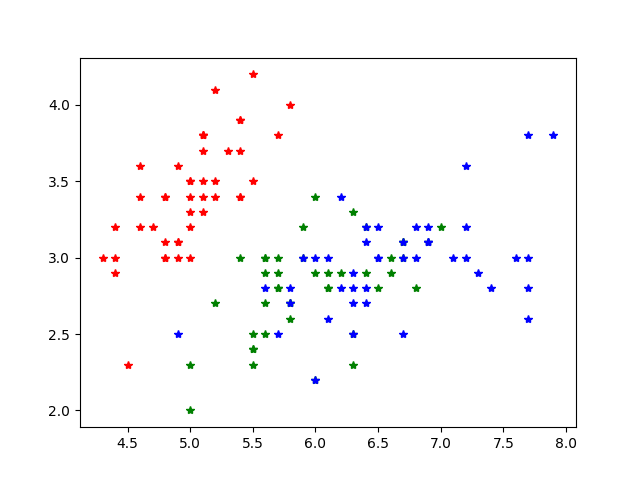

In [29]:
df = precdit_iris
fig, ax = plt.subplots()
colors = {0:'r', 1:'g', 2:'b'}
for l, color in colors.items():
    keep = label2 ==l
    ax.plot(df.loc[keep, 'sepal_length'], df.loc[keep, 'sepal_width'], ls='None', marker='o', color=color)

fig, ax = plt.subplots()
for l, color in colors.items():
    keep = precdit_iris['species'] ==l
    ax.plot(df.loc[keep, 'sepal_length'], df.loc[keep, 'sepal_width'], ls='None', marker='*', color=color)